1. take in image
2. find the pnn
    - pnnclim = pnn(imname)
3. euclidean distance array
    - distance = ndi.distance_transform_edt(np.invert(pnnclim))[0, :, :]
4. feed in the particle array 
    - min of fourth/third column
    - average of fourth/third column
    - bin in all different ways

In [109]:
def pnn(imname):
    import matplotlib.pyplot as plt
    import skimage.io
    from skimage.filters import threshold_mean
    from skimage.morphology import remove_small_objects

    img = skimage.io.imread(imname) #the image needs to be in the same folder as the code

    pnn = img[:, :, 1]

    thresh = threshold_mean(pnn)
    pnnbinary = pnn > thresh

    pnnclim = remove_small_objects(pnnbinary, min_size=2000)
    
    return [pnnclim]

In [110]:
pnnclim = pnn('HBBS_vid_1_overlay_frame_1.tif')

In [111]:
def partbin(particles, pnnclim):
    partdistance = np.zeros((len(particles), 4)) #array with x, and y coordinates of particles and the distance to the cells
    
    from scipy import ndimage as ndi
    distance = ndi.distance_transform_edt(1-cellclim)
    
    for i in range(0,len(particles)): #need parenthese not brackets
        partdistance[i,0] = particles[i,0]
        partdistance[i,1] = particles[i,1]
        partdistance[i,2] = distance[int(particles[i,0]),int(particles[i,1])] #force int
        if partdistance[i,2] == 0:
            partdistance[i,3] = 1
        elif partdistance[i,2] > 0 and partdistance[i,2] <= 20:
            partdistance[i,3] = 2
        elif partdistance[i,2] > 20 and partdistance[i,2] <= 80: 
            partdistance[i,3] = 3
        else:
            partdistance[i,3] = 4

    return [partdistance]

In [112]:
partbin(particles, pnnclim)

[array([[ 50.63218391,  86.73563218,   7.        ,   2.        ],
        [ 86.99438202, 332.84269663,  13.03840481,   2.        ],
        [ 96.66666667, 326.33333333,   3.60555128,   2.        ],
        [106.48148148, 335.18518519,   9.05538514,   2.        ],
        [157.54545455,  80.36363636,   0.        ,   1.        ],
        [207.875     , 368.875     ,   5.38516481,   2.        ],
        [234.08333333, 179.33333333,   4.        ,   2.        ],
        [247.66666667, 281.66666667,   9.8488578 ,   2.        ],
        [296.53191489, 244.10638298,   2.        ,   2.        ],
        [329.        , 387.54545455,  23.08679276,   3.        ]])]

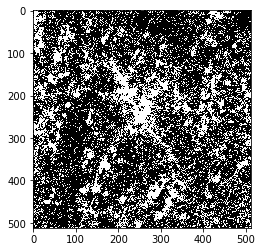

In [81]:
import matplotlib.pyplot as plt

import skimage.io
from skimage.filters import threshold_mean

imname = 'HBBS_vid_1_overlay_frame_1.tif'
img = skimage.io.imread(imname)

partnucl = img[:, :, 1]

thresh = threshold_mean(partnucl)
partbinary = partnucl > thresh

plt.imshow(partbinary, cmap='gray')
plt.show()

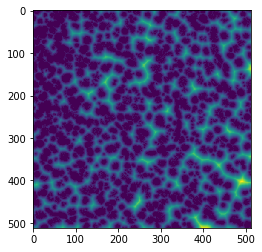

In [82]:
from scipy import ndimage as ndi
distance = ndi.distance_transform_edt(1-cellbinary)

plt.imshow(distance)
plt.show()

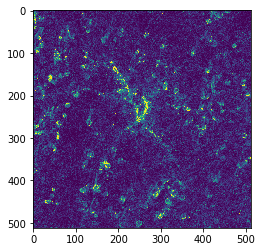

In [45]:
plt.imshow(img[:, :, 1])
#Chanel 2 = dapi
#Chanel 1 = pnn
#Chanel 0 = particles
plt.show()

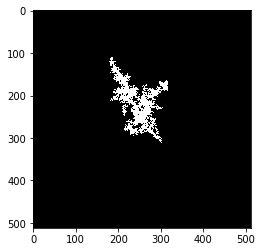

In [56]:
from skimage.morphology import remove_small_objects

partclim = remove_small_objects(partbinary, min_size=2000)
plt.imshow(partclim, cmap='gray')
plt.show()

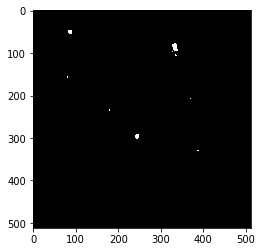

In [113]:
import matplotlib.pyplot as plt

import skimage.io
from skimage.filters import threshold_yen

imname = 'HBBS_vid_1_overlay_frame_1.tif'
img = skimage.io.imread(imname)

partnucl = img[:, :, 0]

thresh = threshold_yen(partnucl)
partbinary = partnucl > thresh

plt.imshow(partbinary, cmap='gray')
plt.show()

In [107]:
import numpy as np
import math as m

partlbim = skimage.measure.label(partbinary)

props = skimage.measure.regionprops(partlbim)

numobj = partlbim.max()

particles = np.zeros((numobj, 2)) #rows, columns

i = 0 
while i < numobj:
    particles[i,0] = props[i].centroid[0] #x-coordinate
    particles[i,1] = props[i].centroid[1] #y-coordinate
    i = i + 1

Roundness Removal:

threshold = 2 #roundness ratio set

onlyround = lbim.copy()

i = 0
numobj = onlyround.max()
while i < numobj:
    if objects[i,5] > threshold:
        objects = np.delete(objects, (i), axis=0)
        sizeobj = np.zeros((1, int(objects[i,3])))
        for j in sizeobj:
            onlyround[onlyround == i] = 0
    numobj = len(objects)
    i = i + 1

In [63]:
print(particles.size)

20


In [108]:
particles

array([[ 50.63218391,  86.73563218],
       [ 86.99438202, 332.84269663],
       [ 96.66666667, 326.33333333],
       [106.48148148, 335.18518519],
       [157.54545455,  80.36363636],
       [207.875     , 368.875     ],
       [234.08333333, 179.33333333],
       [247.66666667, 281.66666667],
       [296.53191489, 244.10638298],
       [329.        , 387.54545455]])

In [57]:
def clim(imname):
    import matplotlib.pyplot as plt
    import skimage.io
    from skimage.filters import threshold_mean
    
    img = skimage.io.imread(imname)

    cellnucl = img[:, :, 1]

    thresh = threshold_mean(cellnucl)
    cellbinary = cellnucl > thresh

    #made binary

    from skimage.morphology import remove_small_objects

    cellclim = remove_small_objects(cellbinary, min_size=2000)

    #remove small objects
    return [cellclim]

In [30]:
def objects(imname):
    clim(imname)

    celllbim = skimage.measure.label(cellclim)

    #label image

    import numpy as np
    import math as m

    props = skimage.measure.regionprops(celllbim)

    numobj = celllbim.max()

    objects = np.zeros((numobj, 6)) #rows, columns

    i = 0 
    while i < numobj:
        objects[i,0] = (i + 1)
        objects[i,1] = props[i].centroid[0] #x-coordinate
        objects[i,2] = props[i].centroid[1] #y-coordinate
        objects[i,3] = props[i].area
        objects[i,4] = props[i].perimeter  
        objects[i,5] = ((props[i].perimeter)**2)/(4*m.pi*props[i].area)
        i = i + 1

    #make array with all the cells
    
    return [objects]

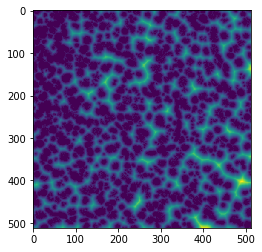

In [9]:
from scipy import ndimage as ndi
distance = ndi.distance_transform_edt(1-cellbinary)

plt.imshow(distance)
plt.show()

In [67]:
partbin(particles, partclim)

[array([[ 50.63218391,  86.73563218, 113.15917992,   4.        ],
        [ 86.99438202, 332.84269663,  80.28075735,   4.        ],
        [ 96.66666667, 326.33333333,  69.23149572,   3.        ],
        [106.48148148, 335.18518519,  62.03224968,   3.        ],
        [157.54545455,  80.36363636, 100.60318086,   4.        ],
        [207.875     , 368.875     ,  54.4242593 ,   3.        ],
        [234.08333333, 179.33333333,  21.21320344,   3.        ],
        [247.66666667, 281.66666667,   2.23606798,   2.        ],
        [296.53191489, 244.10638298,   3.        ,   2.        ],
        [329.        , 387.54545455,  87.09190548,   4.        ]])]

In [47]:
clim('HBBS_vid_1_overlay_frame_1.tif')

[array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])]